# Weather models : 2D parameters

The aim of this notebook is to indicate how to read the 2D data from weather models.
There are 2 weather models:
* a fine-mesh french weather model called 'AROME' (spatial resolution of 0.025°)
* a large-mesh french weather model called 'ARPEGE' (spatial resolution of 0.1°)

Per model and day, you have the model run of 00h with range forecasts from 00h to 24h. The time step is 1h.

Here are the different weather parameters:

* at 2m: temperature (in K), dew point temperature** (in K) and relative humidity (in %)
* at 10m: wind speed (in m.s<sup>-1</sup>), wind direction (in degrees), U and V wind components*** (in m.s<sup>-1</sup>)
* at the sea level: mean sea level pressure (in Pa)
* at the ground level: total precipitation (in kg m<sup>-2</sup> which is equivalent to mm) **since the beginning of the model run**

For more information about data, cf [documentation](https://meteofrance.github.io/meteonet/english/data/weather-models/).

** : temperature for which it is needed to refresh an air volume at constant pressure and humidity to become it saturated (i.e. condensation temperature)

*** : horizontal wind speed components, U : from west to east and V : from south to north. 

# Note

<font size="4.5">To use <span style="color:blue">**Cartopy**</span>, a library to plot data with basemaps (see cells below), it is necessary to <span style="color:red">activate the internet connection</span> of that notebook (in edit mode, you can find on the right column, in the *Settings* section, a row entitled *Internet*, put the slider bar on **on**).  </font>

<font size="4.5">If it does not still work, check you use the latest environment (in the *Settings* section, click on **Preferences**).</font>

In [87]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import datetime

In [10]:
coords_fname  = './../data/Other/Other/stations_coordinates.csv'
coords = pd.read_csv(coords_fname)

In [89]:
first_date = datetime.datetime(2016,1,1)    
last_date = datetime.datetime(2017,12,31)
fname = './../data/Train/Train/X_station_train.csv'
train = pd.read_csv(fname,parse_dates=['date'],infer_datetime_format=True)

In [102]:
train["only_date"] = list(train.date.dt.date)

In [109]:
data

<xarray.Dataset>
Dimensions:     (latitude: 249, longitude: 249, valid_time: 25)
Coordinates:
    time        datetime64[ns] ...
  * latitude    (latitude) float32 49.33 49.15 49.18 48.93 ... 46.41 46.84 48.53
  * longitude   (longitude) float32 -0.43 0.04 -0.46 -0.15 ... 0.841 0.458 1.995
  * valid_time  (valid_time) datetime64[ns] 2016-01-01 ... 2016-01-02
Data variables:
    ws          (latitude, valid_time) float32 ...
    p3031       (latitude, valid_time) float32 ...
    u10         (latitude, valid_time) float32 ...
    v10         (latitude, valid_time) float32 ...
    t2m         (latitude, valid_time) float32 ...
    d2m         (latitude, valid_time) float32 ...
    r           (latitude, valid_time) float32 ...
    tp          (latitude, valid_time) float32 ...
    msl         (latitude, valid_time) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             lfpw
    GRIB_centreDescription:  French Weather Service - Toulouse
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             French Weather Service - Toulouse
    history:                 2021-08-25T14:57:57 GRIB to CDM+CF via cfgrib-0....

In [123]:
lat

49.33

In [124]:
data.sel(latitude=lat,longitude=long)

<xarray.Dataset>
Dimensions:     (valid_time: 25)
Coordinates:
    time        datetime64[ns] ...
    latitude    float32 49.33
    longitude   float32 -0.43
  * valid_time  (valid_time) datetime64[ns] 2016-01-01 ... 2016-01-02
Data variables:
    ws          (valid_time) float32 ...
    p3031       (valid_time) float32 ...
    u10         (valid_time) float32 ...
    v10         (valid_time) float32 ...
    t2m         (valid_time) float32 ...
    d2m         (valid_time) float32 ...
    r           (valid_time) float32 ...
    tp          (valid_time) float32 ...
    msl         (valid_time) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             lfpw
    GRIB_centreDescription:  French Weather Service - Toulouse
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             French Weather Service - Toulouse
    history:                 2021-08-25T14:57:57 GRIB to CDM+CF via cfgrib-0....

In [130]:
df_tot

,ws,p3031,u10,v10,t2m,d2m,r,tp,msl,date,Id
0,3.124363,203.679962,1.292635,2.833911,279.918060,278.768555,92.398743,NaN,102288.570312,2016-01-01 00:00:00,14066001
1,2.543492,216.527695,1.542107,1.988854,279.641632,278.460327,92.187126,0.000000,102308.867188,2016-01-01 01:00:00,14066001
2,2.658221,193.726913,0.620815,2.566165,279.170837,278.027252,92.392624,0.000000,102283.406250,2016-01-01 02:00:00,14066001
3,2.730759,178.975250,-0.037779,2.723996,278.838074,277.722015,92.543671,0.000000,102265.835938,2016-01-01 03:00:00,14066001
4,2.961016,150.908859,-1.437657,2.552090,278.322723,277.696167,95.738686,0.000000,102222.296875,2016-01-01 04:00:00,14066001
...,...,...,...,...,...,...,...,...,...,...,...
70,6.599361,149.280609,-3.375980,5.665531,280.445831,278.116028,85.132622,0.070312,100833.492188,2016-01-01 20:00:00,14137001
71,7.796742,150.568451,-3.834734,6.785989,280.990387,278.689728,85.364258,0.070312,100699.742188,2016-01-01 21:00:00,14137001
72,8.037178,154.548355,-3.453660,7.255263,281.202057,279.042419,86.233902,0.070273,100602.789062,2016-01-01 22:00:00,14137001
73,8.079736,155.417511,-3.363263,7.348280,281.543304,279.578918,87.438164,0.070273,100530.132812,2016-01-01 23:00:00,14137001


In [142]:
model = "arome"
param = ["ws", "p3031", "u10", "v10", "t2m", "d2m", "r", "tp", "msl"]
df_tot = pd.DataFrame()
for file_date in list(train.date.dt.date.unique())[0:1] :
    print(file_date)
    print(type(file_date))
    for number_sta in list(train[train["only_date"]==file_date]["number_sta"].unique()):
        fname = "./../data/Train/Train/X_forecast/2D_%s_%s.nc" %(model,file_date.strftime('%Y%m%d'))
        data = xr.open_dataset(fname)
        lat = list(coords[coords["number_sta"]==number_sta]["lat"])[0]
        print(lat)
        long = list(coords[coords["number_sta"]==number_sta]["lon"])[0]
        print(long)
        try :
            print("cas 1")
            val_tab = np.array(data.sel(latitude=lat,longitude=long,method="nearest")[param].to_array())
        except :
            print("cas 2")
            lat = round(lat, 2)
            long = round(long,2)
            val_tab = np.array(data.sel(latitude=lat,longitude=long,method="pad")[param].to_array())
        df_ind = pd.DataFrame(val_tab.T,columns = param)
        df_ind["date"] = data["valid_time"]
        df_ind["Id"] = [number_sta]*25
        df_tot = pd.concat([df_tot,df_ind],ignore_index=True)
        

2016-01-01
<class 'datetime.date'>
49.334
-0.431
cas 1
cas 2


InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [138]:
val_tab.shape

(9, 25)

In [132]:
val_tab[1,1,9]

140.32784

In [133]:
model = 'arome'  #weather model (arome or arpege)
param = "tp"   #parameter name in the file (cf cells below to know the parameter names -> exploration of metadata)
file_date = dt.datetime(2017, 2, 14) # Day example 

In [134]:
fname = "./../data/Train/Train/X_forecast/2D_%s_%s.nc" %(model,file_date.strftime('%Y%m%d'))
data = xr.open_dataset(fname)

In [13]:
da = xr.DataArray(
   ...:     np.random.rand(4, 3),
   ...:     [
   ...:         ("time", pd.date_range("2000-01-01", periods=4)),
   ...:         ("space", ["IA", "IL", "IN"]),
   ...:     ],
   ...: )

In [4]:
data # tp et msl not present in test ["data", "ws", "p3031", "u10", "v10", "t2m", "d2m", "r", "tp", "msl"]

<xarray.Dataset>
Dimensions:     (latitude: 227, longitude: 315, valid_time: 25, Id: 25)
Coordinates:
    time        datetime64[ns] ...
  * latitude    (latitude) float32 51.9 51.87 51.85 51.82 ... 46.3 46.27 46.25
  * longitude   (longitude) float32 -5.842 -5.817 -5.792 ... 1.958 1.983 2.008
  * valid_time  (valid_time) datetime64[ns] 2017-02-14 ... 2017-02-15
  * Id          (Id) object '409_0' '409_1' '409_2' ... '409_23' '409_24'
Data variables:
    ws          (valid_time, latitude, longitude) float32 ...
    p3031       (valid_time, latitude, longitude) float32 ...
    u10         (valid_time, latitude, longitude) float32 ...
    v10         (valid_time, latitude, longitude) float32 ...
    t2m         (valid_time, latitude, longitude) float32 ...
    d2m         (valid_time, latitude, longitude) float32 ...
    r           (valid_time, latitude, longitude) float32 ...
    tp          (valid_time, latitude, longitude) float32 ...
    msl         (valid_time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             lfpw
    GRIB_centreDescription:  French Weather Service - Toulouse
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             French Weather Service - Toulouse
    history:                 2021-09-30T18:02:47 GRIB to CDM+CF via cfgrib-0....

In [40]:
coord = 'longitude'
data[coord]

<xarray.DataArray 'longitude' (longitude: 315)>
array([-5.842, -5.817, -5.792, ...,  1.958,  1.983,  2.008], dtype=float32)
Coordinates:
    time       datetime64[ns] 2017-02-14
  * longitude  (longitude) float32 -5.842 -5.817 -5.792 ... 1.958 1.983 2.008

In [17]:
data[coord].values[0:10]

array([-5.842, -5.817, -5.792, -5.767, -5.742, -5.717, -5.692, -5.667,
       -5.642, -5.617], dtype=float32)

In [18]:
run_date = data['time']
#run_date.values     #get the values
run_date

<xarray.DataArray 'time' ()>
array('2017-02-14T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2017-02-14
Attributes:
    long_name:      initial time of forecast
    standard_name:  forecast_reference_time

In [19]:
range_forecasts_dates = data['valid_time']
range_forecasts_dates

<xarray.DataArray 'valid_time' (valid_time: 25)>
array(['2017-02-14T00:00:00.000000000', '2017-02-14T01:00:00.000000000',
       '2017-02-14T02:00:00.000000000', '2017-02-14T03:00:00.000000000',
       '2017-02-14T04:00:00.000000000', '2017-02-14T05:00:00.000000000',
       '2017-02-14T06:00:00.000000000', '2017-02-14T07:00:00.000000000',
       '2017-02-14T08:00:00.000000000', '2017-02-14T09:00:00.000000000',
       '2017-02-14T10:00:00.000000000', '2017-02-14T11:00:00.000000000',
       '2017-02-14T12:00:00.000000000', '2017-02-14T13:00:00.000000000',
       '2017-02-14T14:00:00.000000000', '2017-02-14T15:00:00.000000000',
       '2017-02-14T16:00:00.000000000', '2017-02-14T17:00:00.000000000',
       '2017-02-14T18:00:00.000000000', '2017-02-14T19:00:00.000000000',
       '2017-02-14T20:00:00.000000000', '2017-02-14T21:00:00.000000000',
       '2017-02-14T22:00:00.000000000', '2017-02-14T23:00:00.000000000',
       '2017-02-15T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
    time        datetime64[ns] 2017-02-14
  * valid_time  (valid_time) datetime64[ns] 2017-02-14 ... 2017-02-15
Attributes:
    standard_name:  time
    long_name:      time

In [20]:
d = data[param]     #param : parameter name defined at the beginning of the Notebook 
d_vals=d.values     #get the values
###examples to get the information from attributes
#d.units                      #unit
#d.long_name                      #long name
d

<xarray.DataArray 'tp' (valid_time: 25, latitude: 227, longitude: 315)>
array([[[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan]],

       [[0.      , 0.      , ..., 0.      , 0.      ],
        [0.      , 0.      , ..., 0.      , 0.      ],
        ...,
        [0.      , 0.      , ..., 1.701402, 1.816074],
        [0.      , 0.      , ..., 1.728984, 1.736585]],

       ...,

       [[1.488129, 1.477705, ..., 0.013465, 0.014334],
        [1.708569, 1.70314 , ..., 0.016289, 0.014986],
        ...,
        [1.564795, 1.735934, ..., 4.642478, 4.875079],
        [1.932266, 2.003936, ..., 4.721749, 4.645953]],

       [[1.488129, 1.477705, ..., 0.013465, 0.014334],
        [1.708569, 1.70314 , ..., 0.016289, 0.014986],
        ...,
        [4.020469, 4.513689, ..., 4.642478, 4.875079],
        [4.687   , 4.672666, ..., 4.721749, 4.645953]]], dtype=float32)
Coordinates:
    time        datetime64[ns] 2017-02-14
  * latitude    (latitude) float32 51.9 51.87 51.85 51.82 ... 46.3 46.27 46.25
  * longitude   (longitude) float32 -5.842 -5.817 -5.792 ... 1.958 1.983 2.008
  * valid_time  (valid_time) datetime64[ns] 2017-02-14 ... 2017-02-15
Attributes:
    long_name:  Total Precipitation
    units:      kg m**-2

In [50]:
coords

,number_sta,lat,lon,height_sta
0,86118001,46.477,0.985,120.0
1,86149001,46.917,0.025,60.0
2,56081003,48.050,-3.660,165.0
3,53215001,47.790,-0.710,63.0
4,22135001,48.550,-3.380,148.0
...,...,...,...,...
320,86137003,47.035,0.098,96.0
321,86165005,46.412,0.841,153.0
322,86273001,46.464,1.042,121.0
323,91200002,48.526,1.993,116.0


The structure of the parameter (3 dimensions):
* number of steps or range forecasts
* number of points in latitude
* number of points in longitude  

In [ ]:
coords ds["air"].sel(lon=target_lon, lat=target_lat, method="nearest")

In [62]:
data["tp"]

<xarray.DataArray 'tp' (valid_time: 25, latitude: 227, longitude: 315)>
array([[[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan]],

       [[0.      , 0.      , ..., 0.      , 0.      ],
        [0.      , 0.      , ..., 0.      , 0.      ],
        ...,
        [0.      , 0.      , ..., 1.701402, 1.816074],
        [0.      , 0.      , ..., 1.728984, 1.736585]],

       ...,

       [[1.488129, 1.477705, ..., 0.013465, 0.014334],
        [1.708569, 1.70314 , ..., 0.016289, 0.014986],
        ...,
        [1.564795, 1.735934, ..., 4.642478, 4.875079],
        [1.932266, 2.003936, ..., 4.721749, 4.645953]],

       [[1.488129, 1.477705, ..., 0.013465, 0.014334],
        [1.708569, 1.70314 , ..., 0.016289, 0.014986],
        ...,
        [4.020469, 4.513689, ..., 4.642478, 4.875079],
        [4.687   , 4.672666, ..., 4.721749, 4.645953]]], dtype=float32)
Coordinates:
    time        datetime64[ns] 2017-02-14
  * latitude    (latitude) float32 51.9 51.87 51.85 51.82 ... 46.3 46.27 46.25
  * longitude   (longitude) float32 -5.842 -5.817 -5.792 ... 1.958 1.983 2.008
  * valid_time  (valid_time) datetime64[ns] 2017-02-14 ... 2017-02-15
Attributes:
    long_name:  Total Precipitation
    units:      kg m**-2

In [135]:
val_tab = np.array(data.sel(latitude=46.477,longitude=0.985,method="nearest")[[ "ws", "p3031", "u10", "v10", "t2m", "d2m", "r", "tp", "msl"]].to_array())

In [79]:
df_ind = pd.DataFrame(val_tab.T,columns = [ "ws", "p3031", "u10", "v10", "t2m", "d2m", "r", "tp", "msl"])

In [82]:
df_ind["date"] = data["valid_time"]
df_ind["Id"] = ["fictionnal_station"]*25

In [136]:
val_tab.shape

(9, 25)

In [85]:
df_ind

,ws,p3031,u10,v10,t2m,d2m,r,tp,msl,date,Id
0,6.235530,109.947006,-5.864971,2.121984,283.278137,280.064728,80.437469,NaN,101632.062500,2017-02-14 00:00:00,fictionnal_station
1,5.425025,114.481316,-4.934120,2.252931,283.216766,280.036865,80.623032,0.250411,101677.976562,2017-02-14 01:00:00,fictionnal_station
2,4.120522,101.438576,-4.036549,0.813342,282.455658,281.008057,90.672165,0.293847,101771.679688,2017-02-14 02:00:00,fictionnal_station
3,4.797506,110.770828,-4.482398,1.705523,282.228638,281.185974,93.181046,1.563057,101777.843750,2017-02-14 03:00:00,fictionnal_station
4,3.632990,100.496124,-3.569165,0.664577,282.052887,281.095520,93.721146,2.341220,101789.351562,2017-02-14 04:00:00,fictionnal_station
5,3.159684,117.756828,-2.792967,1.472221,282.712250,280.568573,86.485657,2.374231,101819.828125,2017-02-14 05:00:00,fictionnal_station
6,2.666333,134.648483,-1.893437,1.875836,282.708649,280.481659,85.976486,2.392257,101890.625000,2017-02-14 06:00:00,fictionnal_station
7,4.559883,166.777512,-1.038445,4.439248,283.141357,281.190430,87.649582,2.838566,101967.992188,2017-02-14 07:00:00,fictionnal_station
8,4.094012,173.842606,-0.444796,4.067540,283.366547,281.778778,89.848434,3.581762,102069.625000,2017-02-14 08:00:00,fictionnal_station
9,4.180332,186.608551,0.475288,4.152491,283.739716,282.314331,90.892426,4.081063,102168.414062,2017-02-14 09:00:00,fictionnal_station


In [12]:
d_vals.shape

(25, 227, 315)

In [30]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [31]:
forecast_date = dt.datetime(2017, 2, 14,12,0)

In [58]:
data.sel(valid_time=forecast_date)

<xarray.Dataset>
Dimensions:     (latitude: 227, longitude: 315, Id: 25)
Coordinates:
    time        datetime64[ns] 2017-02-14
  * latitude    (latitude) float32 51.9 51.87 51.85 51.82 ... 46.3 46.27 46.25
  * longitude   (longitude) float32 -5.842 -5.817 -5.792 ... 1.958 1.983 2.008
    valid_time  datetime64[ns] 2017-02-14T12:00:00
  * Id          (Id) object '409_0' '409_1' '409_2' ... '409_23' '409_24'
Data variables:
    ws          (latitude, longitude) float32 ...
    p3031       (latitude, longitude) float32 ...
    u10         (latitude, longitude) float32 ...
    v10         (latitude, longitude) float32 ...
    t2m         (latitude, longitude) float32 ...
    d2m         (latitude, longitude) float32 ...
    r           (latitude, longitude) float32 ...
    tp          (latitude, longitude) float32 1.44 1.405 1.32 ... 4.689 4.608
    msl         (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             lfpw
    GRIB_centreDescription:  French Weather Service - Toulouse
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             French Weather Service - Toulouse
    history:                 2021-09-30T18:02:47 GRIB to CDM+CF via cfgrib-0....

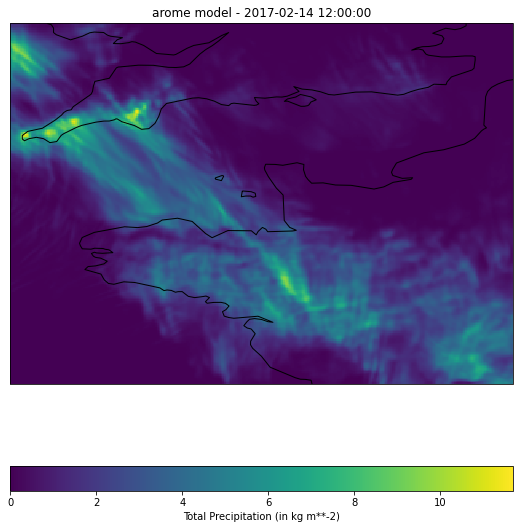

In [15]:
# Coordinates of studied area boundaries (in °N and °E)
lllat = 46.25  #lower left latitude
urlat = 51.896  #upper right latitude
lllon = -5.842  #lower left longitude
urlon = 2  #upper right longitude
extent = [lllon, urlon, lllat, urlat]

fig=plt.figure(figsize=(9,10))

# Select projection
ax = plt.axes(projection=ccrs.PlateCarree())

#plot the data and the background map (coastlines and borders)
img = ax.imshow(data.sel(valid_time=forecast_date)[param], interpolation='none', origin='upper', extent=extent)
ax.coastlines(resolution='50m', linewidth=1)
ax.add_feature(cfeature.BORDERS.with_scale('50m'))


plt.colorbar(img, orientation= 'horizontal').set_label(d.long_name+ ' (in '+d.units+ ')')
plt.title(model +" model - "+str(forecast_date))
plt.show()

In [ ]:
###  pour chaque station mettre l'évolution globale d'un jour
